# Accuracy of edge proportions in spanning trees

sample a graph, normalize weights and check that all sampling algorithms are consistent with the proportion of edges in the graph

In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import treesampling.algorithms as ta
import treesampling.utils.graphs as tg
import treesampling.utils.visualization as vis
from treesampling.utils.visualization import plot_logweights_heatmap

np.random.seed(0)


<Axes: >

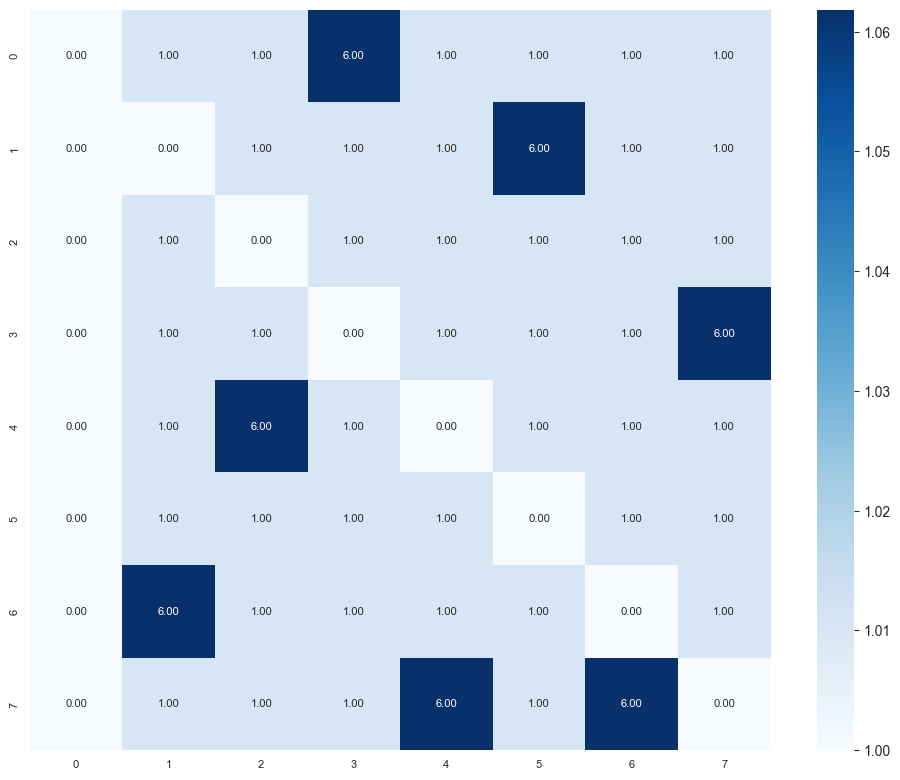

In [3]:
n_nodes = 8
# generate random adjacency matrix
graph, tree = tg.random_tree_skewed_graph(8, 5, root=0)
matrix = nx.to_numpy_array(graph)
vis.plot_logweights_heatmap(matrix)

In [33]:
import numpy.linalg as la
from treesampling.utils.graphs import mat_minor, tuttes_tot_weight

#condition number
L = np.diag(matrix.sum(axis=0)) - matrix

print(f"Condition number: {la.cond(L)}")

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 12. -1. -1. -1. -6. -1. -1.]
 [ 0. -1. 12. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. 12. -1. -1. -1. -6.]
 [ 0. -1. -6. -1. 12. -1. -1. -1.]
 [ 0. -1. -1. -1. -1. 12. -1. -1.]
 [ 0. -6. -1. -1. -1. -1. 12. -1.]
 [ 0. -1. -1. -1. -6. -1. -6. 12.]]
Condition number: inf


In [36]:
# sample many trees with Colbourn
sample_size = 5000
tot_weight_colbourn = 0
seen_trees = set()
edge_freq = np.zeros((n_nodes, n_nodes))
for s in range(sample_size):
    tree = ta.colbourn_rst(graph, root=0)
    tnwk = tg.tree_to_newick(tree)
    if tnwk not in seen_trees:
        seen_trees.add(tnwk)
        tot_weight_colbourn += tg.graph_weight(tree)
    for e in tree.edges():
        edge_freq[e[0], e[1]] += 1

/Users/zemp/PycharmProjects/treesampling/src/treesampling/utils/math.py:50: RuntimeWarning: invalid value encountered in divide
  return arr / np.sum(arr, axis=axis, keepdims=True)


In [14]:
edge_freq.sum(axis=0)

array([   0., 5000., 5000., 5000., 5000., 5000., 5000., 5000.])

In [16]:
expected_counts = (matrix / matrix.sum(axis=0, keepdims=True)) * sample_size
expected_counts[:, 0] = 0
expected_counts.sum(axis=0)

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_76172/649191752.py:1: RuntimeWarning: invalid value encountered in divide
  expected_counts = (matrix / matrix.sum(axis=0, keepdims=True)) * sample_size


array([   0., 5000., 5000., 5000., 5000., 5000., 5000., 5000.])

Text(0.5, 0.98, 'COLBOURN (L=5000)')

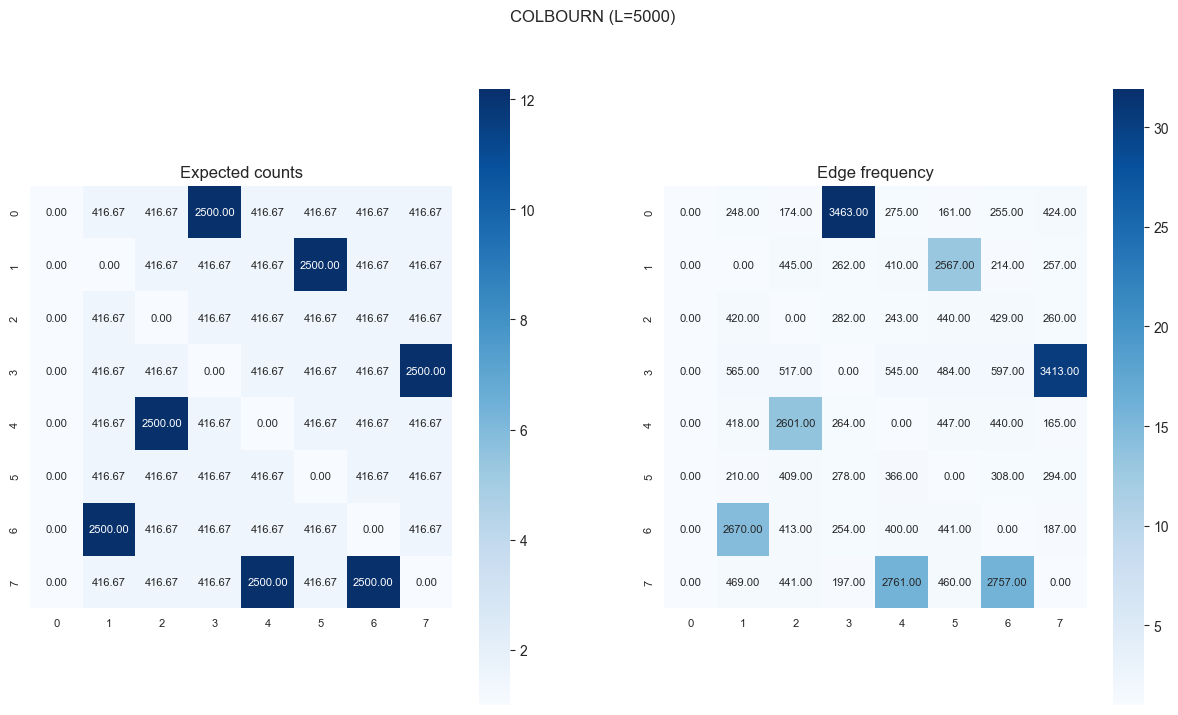

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
vis.plot_logweights_heatmap(expected_counts, ax=axs[0], color_tempering=1000)
axs[0].set_title('Expected counts')
vis.plot_logweights_heatmap(edge_freq, color_tempering=1000, ax=axs[1])
axs[1].set_title('Edge frequency')
fig.suptitle(f'COLBOURN (L={sample_size})')

In [37]:
# same with wilson

wilson_tot_weight = 0
seen_trees = set()
edge_freq_wilson = np.zeros((n_nodes, n_nodes))
for s in range(sample_size):
    tree = ta.wilson_rst(graph)
    tnwk = tg.tree_to_newick(tree)
    if tnwk not in seen_trees:
        seen_trees.add(tnwk)
        wilson_tot_weight += tg.graph_weight(tree)
    for e in tree.edges():
        edge_freq_wilson[e[0], e[1]] += 1


Text(0.5, 0.98, 'WILSON (L=5000)')

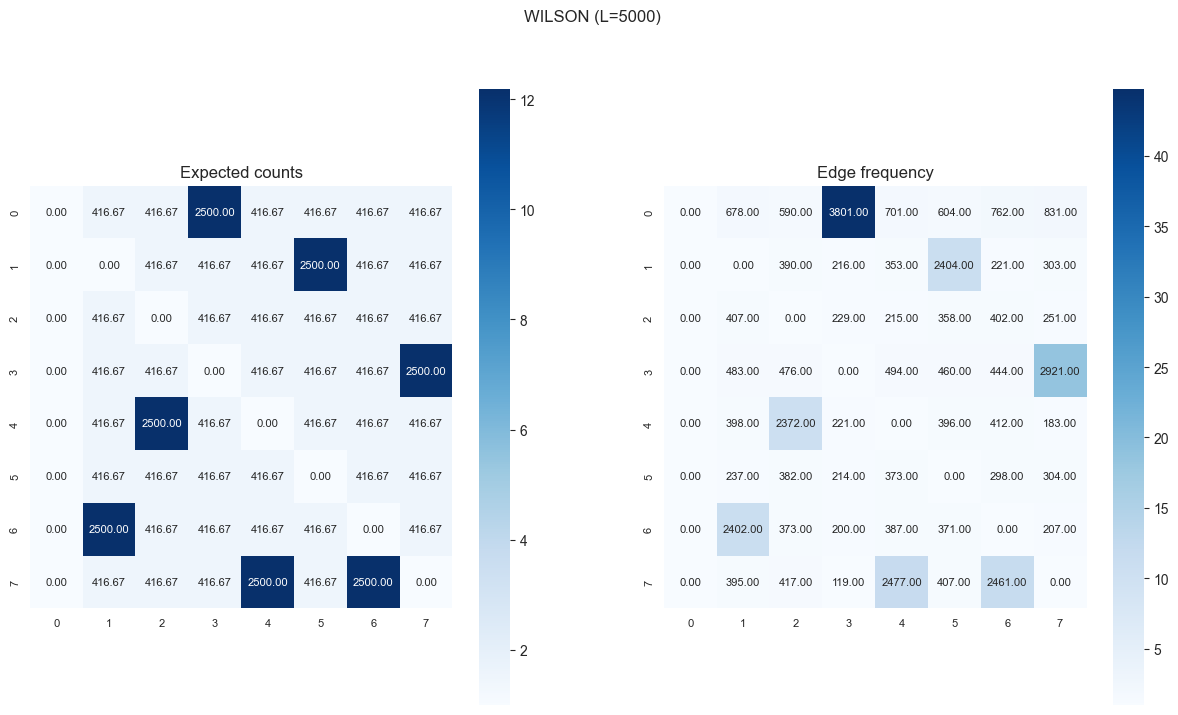

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
vis.plot_logweights_heatmap(expected_counts, ax=axs[0], color_tempering=1000)
axs[0].set_title('Expected counts')
vis.plot_logweights_heatmap(edge_freq_wilson, color_tempering=1000, ax=axs[1])
axs[1].set_title('Edge frequency')
fig.suptitle(f'WILSON (L={sample_size})')

In [38]:
# same with castaway

tot_weight_castaway = 0
seen_trees = set()
edge_freq_castaway = np.zeros((n_nodes, n_nodes))
for s in range(sample_size):
    tree = ta.random_spanning_tree(graph, root=0)
    tnwk = tg.tree_to_newick(tree)
    if tnwk not in seen_trees:
        seen_trees.add(tnwk)
        tot_weight_castaway += tg.graph_weight(tree)
    for e in tree.edges():
        edge_freq_castaway[e[0], e[1]] += 1


/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_76172/2801784242.py:7: DeprecationWarning: Use the new object CastawayRST with log_probs=False
  tree = ta.random_spanning_tree(graph, root=0)


Text(0.5, 0.98, 'CASTAWAY (L=5000)')

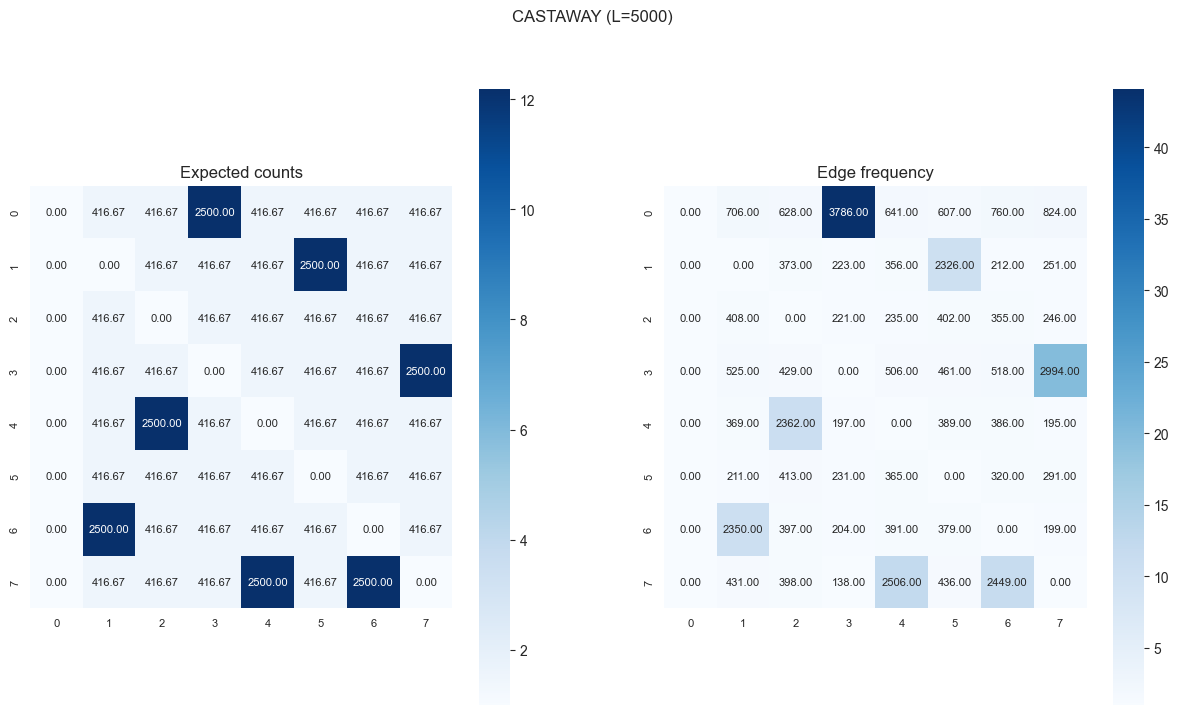

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
vis.plot_logweights_heatmap(expected_counts, ax=axs[0], color_tempering=1000)
axs[0].set_title('Expected counts')
vis.plot_logweights_heatmap(edge_freq_castaway, color_tempering=1000, ax=axs[1])
axs[1].set_title('Edge frequency')
fig.suptitle(f'CASTAWAY (L={sample_size})')

In [27]:
# kulkarni A8 (kirchoff rst)
edge_freq_kirchoff = np.zeros((n_nodes, n_nodes))

for s in range(sample_size):
    tree = ta.kirchoff_rst(graph, root=0)
    for e in tree.edges():
        edge_freq_kirchoff[e[0], e[1]] += 1


Text(0.5, 0.98, 'KIRCHOFF (L=5000)')

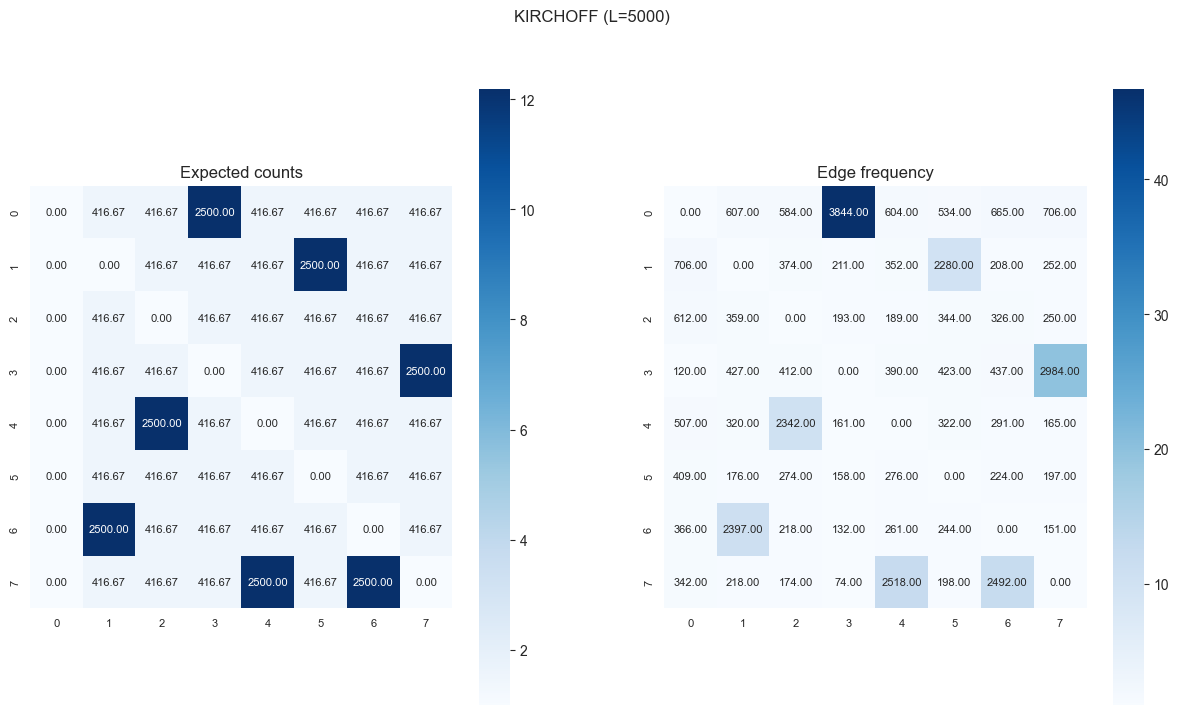

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
vis.plot_logweights_heatmap(expected_counts, ax=axs[0], color_tempering=1000)
axs[0].set_title('Expected counts')
vis.plot_logweights_heatmap(edge_freq_kirchoff, color_tempering=1000, ax=axs[1])
axs[1].set_title('Edge frequency')
fig.suptitle(f'KIRCHOFF (L={sample_size})')


In [39]:
# TOTAL weight analysis
tot_weight_tutte = tg.tuttes_tot_weight(graph, 0)
print(f"Total weight: {tot_weight_tutte}")
print(f"Colbourn: {tot_weight_colbourn}")
print(f"Wilson: {wilson_tot_weight}")
print(f"Castaway: {tot_weight_castaway}")



Total weight: 13322439.000000007
Colbourn: 0.11432177801354958
Wilson: 0.1566397654285363
Castaway: 0.15821512551084105
